# Investigation of FMN initialized by AA 
FMN minimazing AA results for eps=3/2 and 5/4 of standard thresholds

In [1]:
from logging_ import Logger
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
logger = Logger(logs_dir="logs_aa")

In [3]:
logger.load_all()

In [4]:
report = logger.report()
report.reset_index(drop=True)

,dataset,norm,model,attack,steps,params,median,n_qs,asr
0,CIFAR10,Linf,Rade2021Helper_R18_extra,aa,2,-eps-0.031373-loss_f-DL,inf,0.0,30.167598
1,CIFAR10,Linf,Gowal2021Improving_70_16_ddpm_100m,fmn,1012,-binary_search_steps-10-init_aa_eps-0.047059-l...,0.047101,17.0,100.000000
2,CIFAR10,L2,Rade2021Helper_R18_ddpm,aa,2,-eps-0.75-loss_f-DL,inf,0.0,24.590164
3,CIFAR10,L1,Engstrom2019Robustness_l2,aa,2,-eps-12.0-loss_f-DL,12.000000,1.0,70.329669
4,CIFAR10,Linf,Gowal2021Improving_R18_ddpm_100m,aa,2,-eps-0.039216-loss_f-DL,0.039216,1.0,45.454544
...,...,...,...,...,...,...,...,...,...
119,CIFAR10,L2,Rebuffi2021Fixing_70_16_cutmix_extra_l2,fmn,1012,-binary_search_steps-10-init_aa_eps-0.75-loss_...,1.112310,37.0,100.000000
120,CIFAR10,Linf,Rade2021Helper_R18_extra,aa,2,-eps-0.039216-loss_f-DL,inf,0.0,43.016762
121,CIFAR10,L2,Engstrom2019Robustness_l2,fmn,112,-binary_search_steps-10-init_aa_eps-0.75-loss_...,0.853142,19.0,100.000000
122,CIFAR10,L2,Rade2021Helper_R18_ddpm,aa,2,-eps-1.0-loss_f-DL,inf,0.0,39.890712


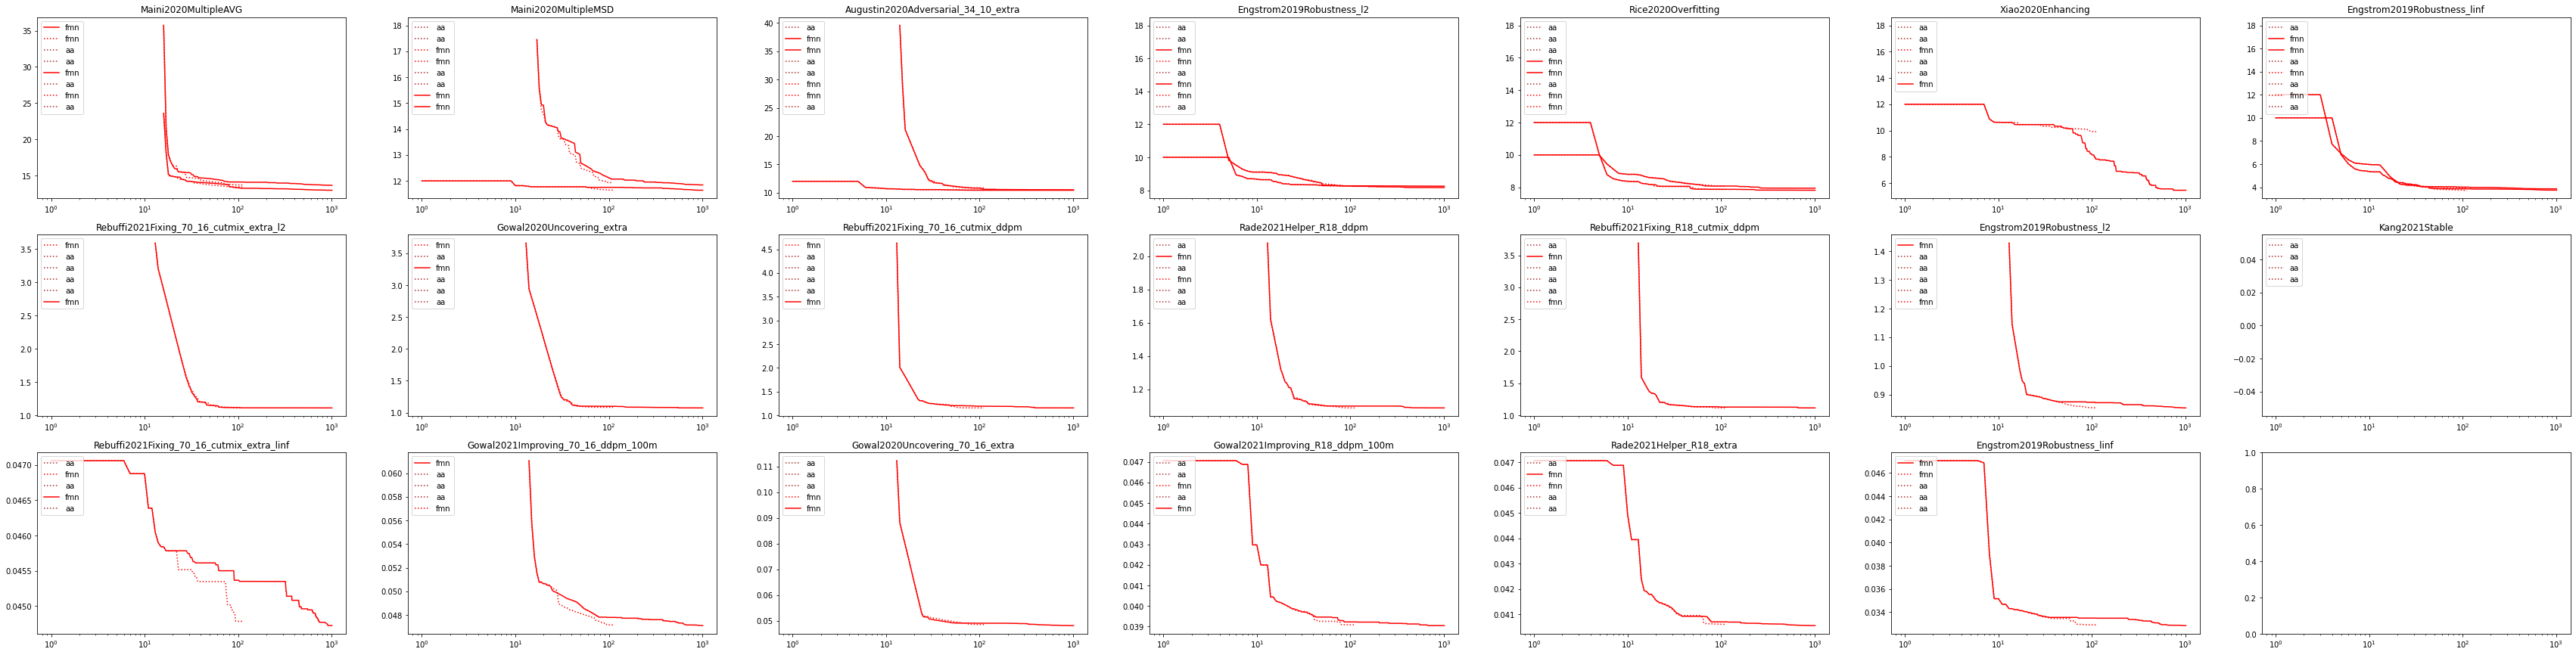

In [5]:
logger.plot_QD_grid(figsize=(60,15))

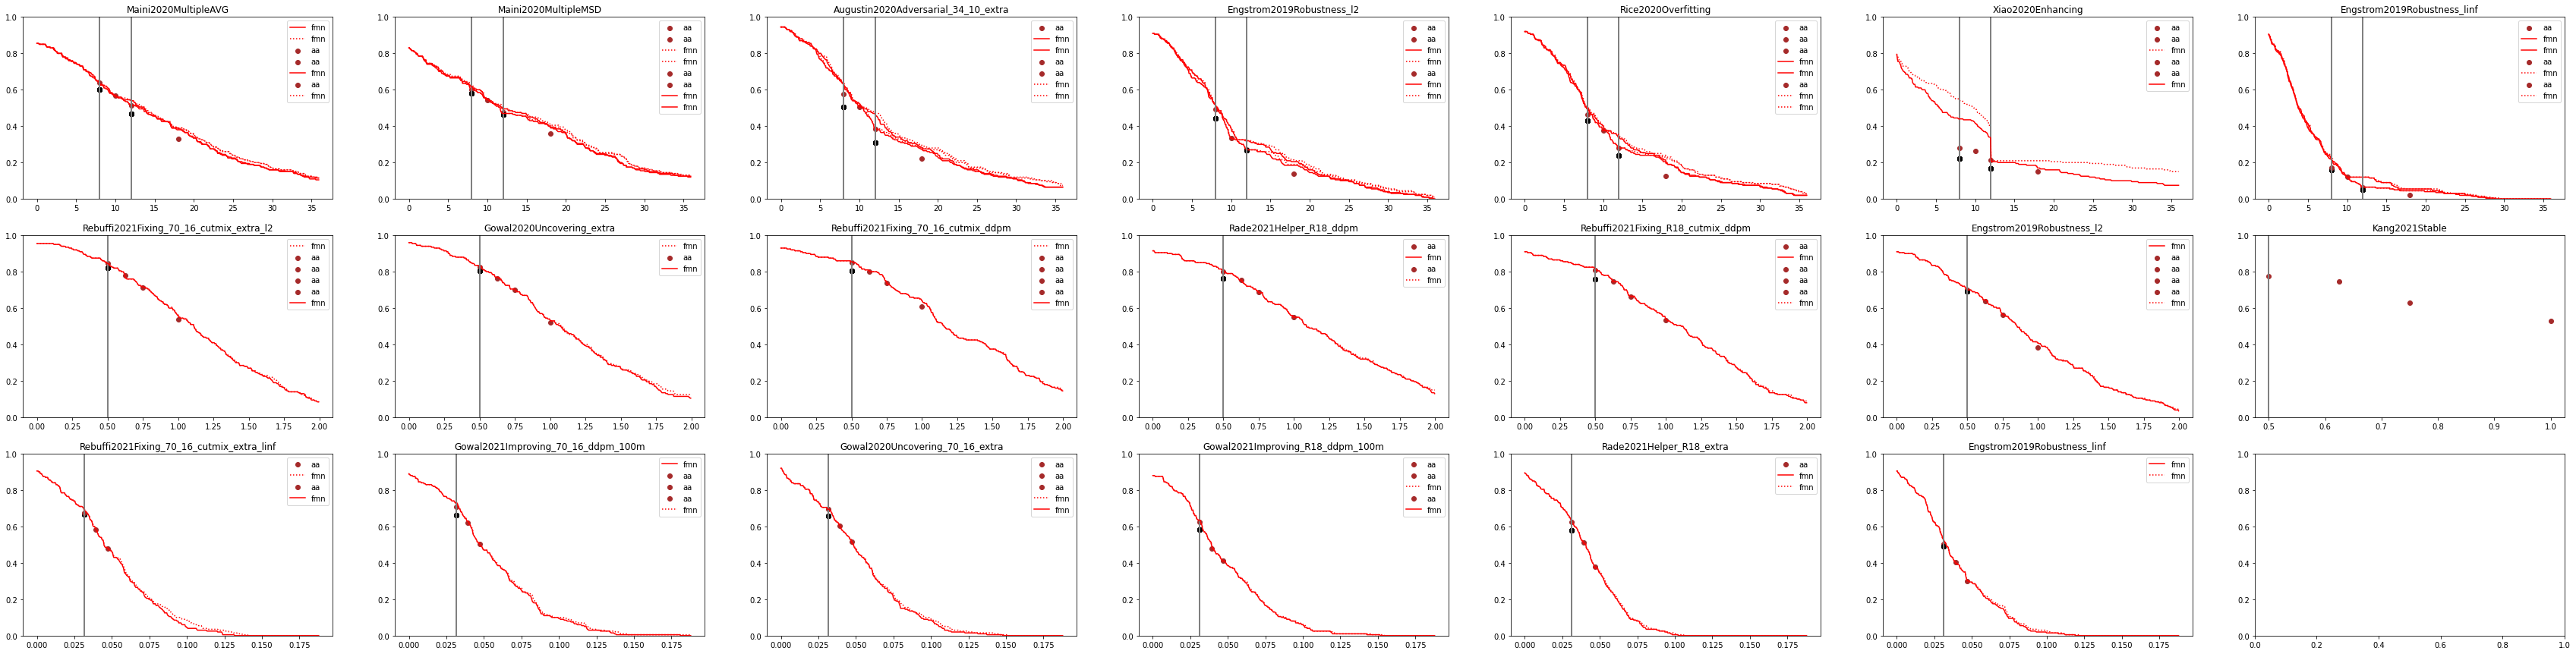

In [6]:
logger.plot_SE_grid(figsize=(60,15))

In [7]:
report = logger.report_ra(logger.where(norm="Linf"), eps=8/255+0.00001)
report.groupby(["model", "attack"])["rob_acc"].min()

model                                      attack
Engstrom2019Robustness_linf                aa        0.505
                                           fmn       0.525
Gowal2020Uncovering_70_16_extra            aa        0.695
                                           fmn       0.695
Gowal2021Improving_70_16_ddpm_100m         aa        0.710
                                           fmn       0.730
Gowal2021Improving_R18_ddpm_100m           aa        0.625
                                           fmn       0.635
Rade2021Helper_R18_extra                   aa        0.625
                                           fmn       0.635
Rebuffi2021Fixing_70_16_cutmix_extra_linf  aa        0.675
                                           fmn       0.695
Name: rob_acc, dtype: float64

In [8]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report.groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Engstrom2019Robustness_linf                  0.0
Gowal2020Uncovering_70_16_extra              0.0
Gowal2021Improving_70_16_ddpm_100m           0.0
Gowal2021Improving_R18_ddpm_100m             0.0
Rade2021Helper_R18_extra                     0.0
Rebuffi2021Fixing_70_16_cutmix_extra_linf    0.0
Name: rob_acc, dtype: float64

In [9]:
report = logger.report_ra(logger.where(norm="L2"), eps=0.5+ 0.00001)
report.groupby(["model", "attack"])["rob_acc"].min()

model                                    attack
Engstrom2019Robustness_l2                aa        0.700
                                         fmn       0.705
Gowal2020Uncovering_extra                aa        0.825
                                         fmn       0.830
Kang2021Stable                           aa        0.775
Rade2021Helper_R18_ddpm                  aa        0.800
                                         fmn       0.800
Rebuffi2021Fixing_70_16_cutmix_ddpm      aa        0.850
                                         fmn       0.855
Rebuffi2021Fixing_70_16_cutmix_extra_l2  aa        0.845
                                         fmn       0.845
Rebuffi2021Fixing_R18_cutmix_ddpm        aa        0.810
                                         fmn       0.815
Name: rob_acc, dtype: float64

In [10]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report.groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Engstrom2019Robustness_l2                  0.0
Gowal2020Uncovering_extra                  0.0
Kang2021Stable                             0.0
Rade2021Helper_R18_ddpm                    0.0
Rebuffi2021Fixing_70_16_cutmix_ddpm        0.0
Rebuffi2021Fixing_70_16_cutmix_extra_l2    0.0
Rebuffi2021Fixing_R18_cutmix_ddpm          0.0
Name: rob_acc, dtype: float64

In [11]:
report = logger.report_ra(logger.where(norm="L1"), eps=8+ 0.00001)
report.groupby(["model", "attack"])["rob_acc"].min()

model                                attack
Augustin2020Adversarial_34_10_extra  aa        0.575
                                     fmn       0.620
Engstrom2019Robustness_l2            aa        0.495
                                     fmn       0.515
Engstrom2019Robustness_linf          aa        0.170
                                     fmn       0.210
Maini2020MultipleAVG                 aa        0.640
                                     fmn       0.630
Maini2020MultipleMSD                 aa        0.600
                                     fmn       0.605
Rice2020Overfitting                  aa        0.465
                                     fmn       0.495
Xiao2020Enhancing                    aa        0.280
                                     fmn       0.440
Name: rob_acc, dtype: float64

In [12]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report.groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Augustin2020Adversarial_34_10_extra    0.00
Engstrom2019Robustness_l2              0.00
Engstrom2019Robustness_linf            0.00
Maini2020MultipleAVG                   0.01
Maini2020MultipleMSD                   0.00
Rice2020Overfitting                    0.00
Xiao2020Enhancing                      0.00
Name: rob_acc, dtype: float64